# Loan Application Status Prediction

## Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

Build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")
print("import complete")

import complete


### Loading the dataset

In [2]:
df = pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Exploratory Data Analysis

In [3]:
# checking shape of dataset
df.shape

(614, 13)

In [4]:
# checking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The dataset has 5 numerical columns and 8 categorical columns

In [5]:
# checking column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# will be dropping Loan_ID as it is not relevant for prediction
df.drop(['Loan_ID'],axis=1,inplace=True)

In [7]:
# checking datatypes of the variables
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
#checking missing values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

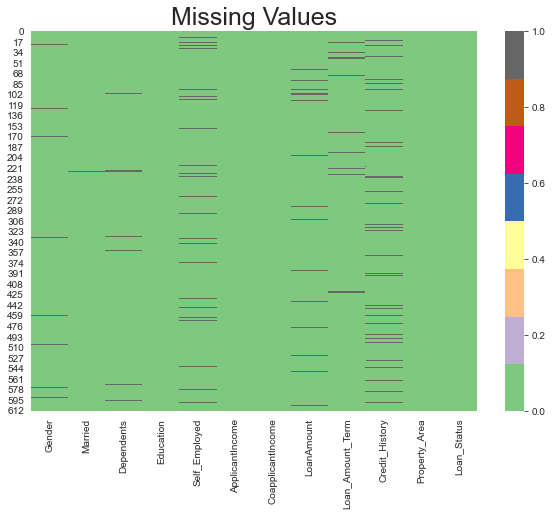

In [9]:
# visualising the missing values 
plt.figure(figsize=(10,7))
plt.title("Missing Values",fontsize=25)
sns.heatmap(df.isnull(),cmap='Accent')
plt.show()

- From above visualisation we can see there are missing values in the dataset. 
- Columns with missing values :
    - Gender
    - Married
    - Dependents
    - Self_Employed
    - LoanAmount
    - Loan_Amount_Term
    - Credit_History

- Analysing Target Variable Income

In [10]:
print(f"Target: 'Loan_Status'\nUnique Values in Loan_Status: {df.Loan_Status.unique()}\nNumber of unique values: {df.Loan_Status.nunique()}")

Target: 'Loan_Status'
Unique Values in Loan_Status: ['Y' 'N']
Number of unique values: 2


In [11]:
# mapping the values of target variable with 0 and 1
# if Loan_Status is Yes mapping with '1' and for No '0'
df.Loan_Status = df.Loan_Status.map({"N":0,"Y":1})
print(f"Target: 'Loan_Status'\nUnique Values in Loan_Status: {df.Loan_Status.unique()}\nNumber of unique values: {df.Loan_Status.nunique()}")

Target: 'Loan_Status'
Unique Values in Loan_Status: [1 0]
Number of unique values: 2


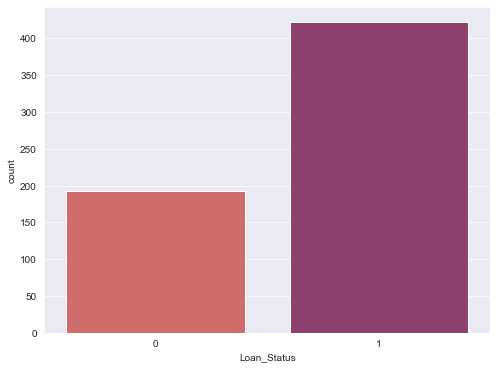

1    422
0    192
Name: Loan_Status, dtype: int64


In [12]:
# visualising the distribution of target column
plt.figure(figsize=(8,6))
sns.countplot(x=df.Loan_Status,palette='flare')
plt.show()
print(df.Loan_Status.value_counts())

- Analysing features types as numerical or categorical

In [13]:
# analysing numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
print(numerical_features)

Number of numerical variables:  6
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']


In [14]:
# visualising numerical features
df[numerical_features].head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,NaN,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1
5,5417,4196.0,267.0,360.0,1.0,1
6,2333,1516.0,95.0,360.0,1.0,1
7,3036,2504.0,158.0,360.0,0.0,0
8,4006,1526.0,168.0,360.0,1.0,1
9,12841,10968.0,349.0,360.0,1.0,0


In [15]:
for i in numerical_features:
    print(f"Total number of unique in {i} : {df[i].nunique()}")

Total number of unique in ApplicantIncome : 505
Total number of unique in CoapplicantIncome : 287
Total number of unique in LoanAmount : 203
Total number of unique in Loan_Amount_Term : 10
Total number of unique in Credit_History : 2
Total number of unique in Loan_Status : 2


In [16]:
# checking statistical summary od numerical variables
df[numerical_features].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


- From the above table we can see the statistical summary of the variables
- Standard deviation for ApplicantIncome and CoapplicantIncome is very high which shows that the data is highly spread and we cannot rely on mean for measure of central tendency of the data, so have to use median for a better approximation.
- There is skewness in the numerical variables as the mean is larger than median for the variables 

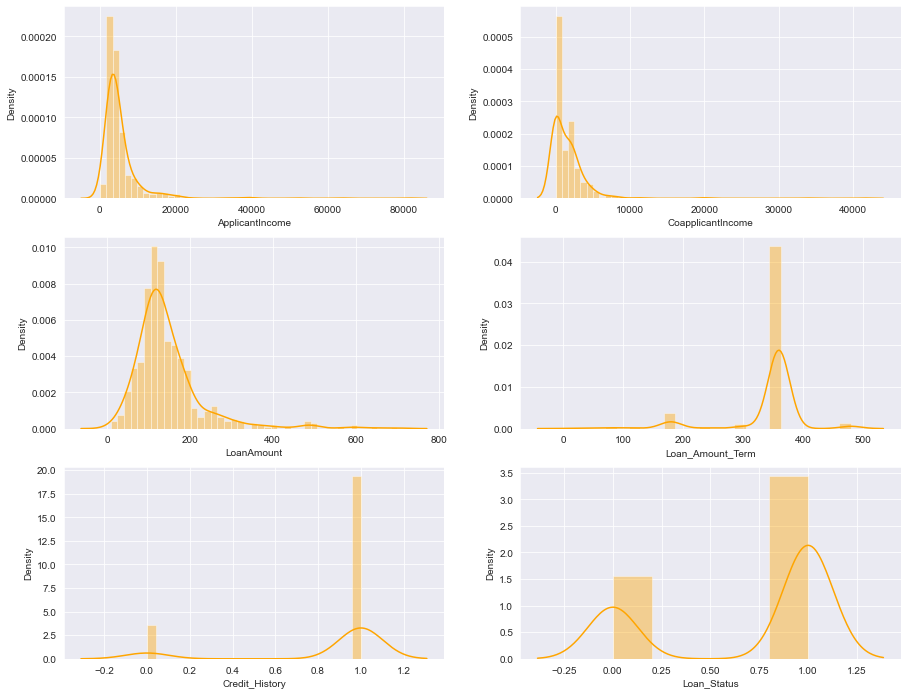

In [17]:
# analysing distribution of the numerical Features
plt.figure(figsize=(15,12))
plot = 1
for var in numerical_features:
    plt.subplot(3,2,plot)
    sns.distplot(df[var],color='orange')
    plot+=1
plt.show()

- From the above plots we can see the distribution of the variables
- ApplicantIncome and CoapplicantIncome have positive skewness 
- Credit_History and Loan_Amount_Term have bimodal distribution which implies they are discrete in nature.

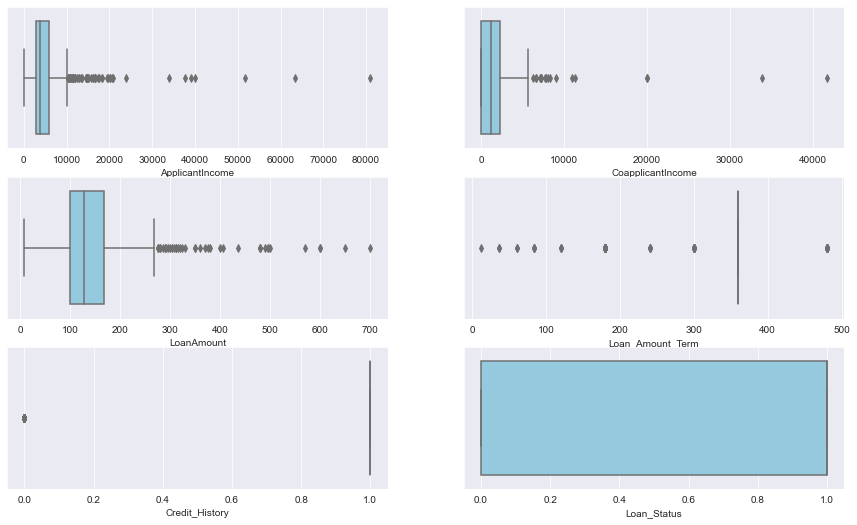

In [18]:
# analysing the spread of data using boxplots through which we can also visualise outliers
plt.figure(figsize=(15,12))
plot = 1
for var in numerical_features:
    plt.subplot(4,2,plot)
    sns.boxplot(x=df[var],color='skyblue')
    plot+=1
plt.show()

- There is presence of outliers in the variables
- However, since Credit_History and Loan_Amount_Term are discrete in nature so we can keep the outliers here.

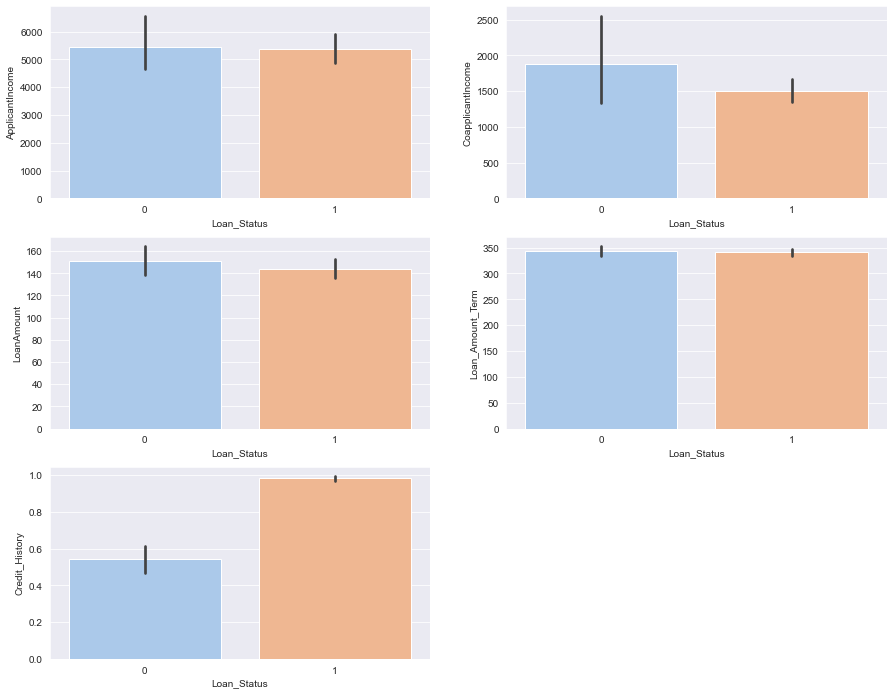

In [19]:
# analysing the variables with respect to Loan_Status 
plt.figure(figsize=(15,12))
plot = 1
cols = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']
for var in cols:
    plt.subplot(3,2,plot)
    sns.barplot(x=df.Loan_Status,y=df[var],palette='pastel')
    plot+=1
plt.show()

- Applicant Income has same count of approval status which implies status may get rejected or accepted even if the applicant has high income
- If the Loan amount is high chances of it getting rejected is slightly higher than approval of loan
- Loan Amount term does not affect the approval of loan 
- If the Credit History is low then the chances of approval of Loan is low

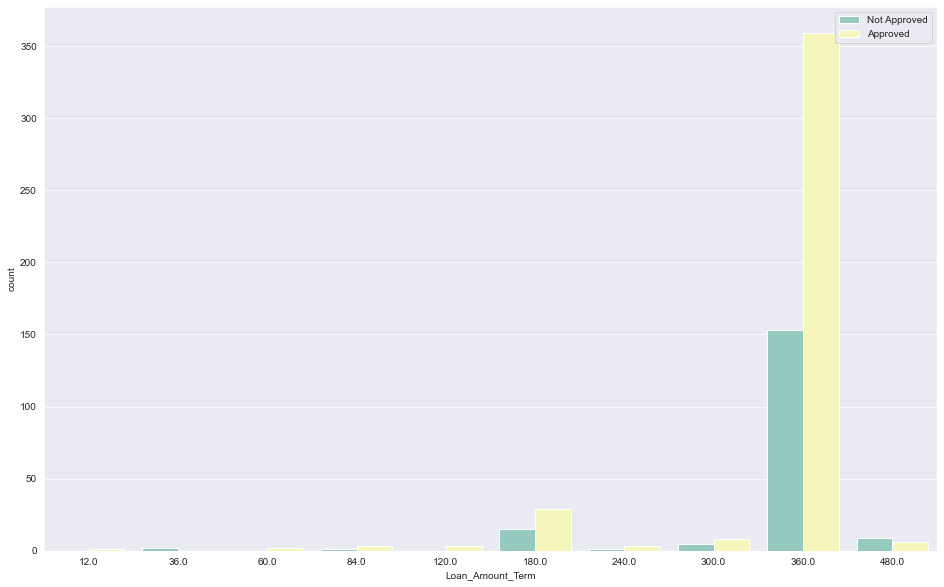

In [20]:
# Visualising the Loan_Amount_Term feature with Loan_Status
plt.figure(figsize=(16,10))
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df,palette='Set3')
plt.legend(labels=['Not Approved','Approved'],loc='upper right')
plt.show()

- Majorly Loans are applied for a 360 term loan 
- Since, Loan Amount term does not affect the approval of loan there is slight difference in some groups
- loan for 360 term amount the loan has highest rate of getting approved
- Loan of term amount less than 360 have higher chances of getting approved

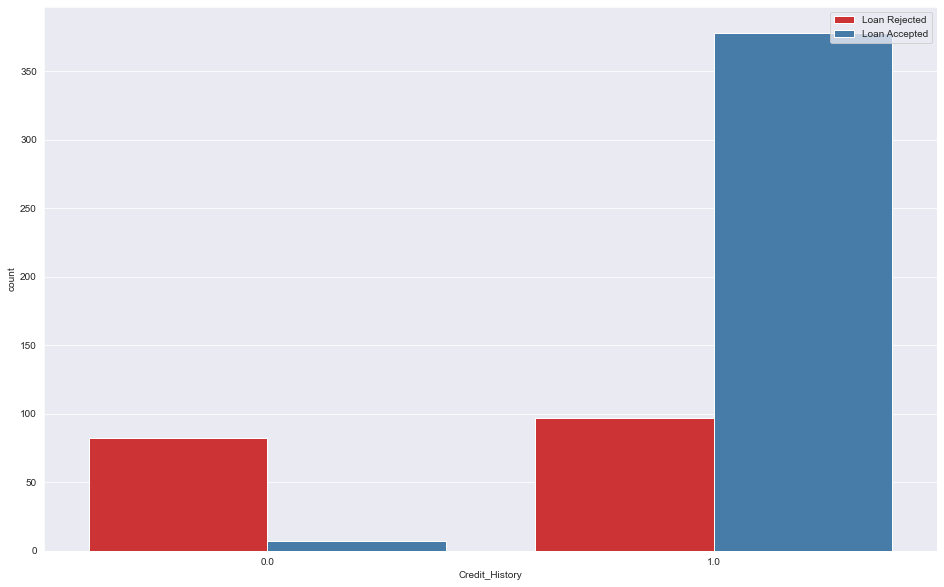

In [21]:
# Visualising the Credit_History feature with Loan_Status
plt.figure(figsize=(16,10))
sns.countplot(x='Credit_History',hue='Loan_Status',data=df,palette='Set1')
plt.legend(labels=['Loan Rejected','Loan Accepted'],loc='upper right')
plt.show()

- If the credit history is near to zero or low the chance of loan getting approved is very less.
- Whereas if the credit history is 1 or near to 1 Loan has good chances of being approved.

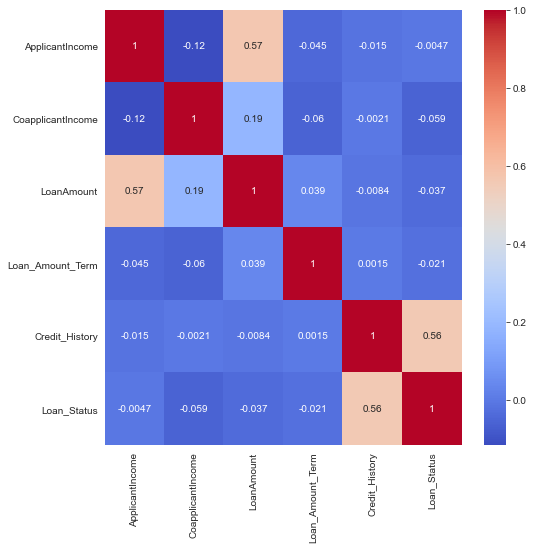

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [23]:
# analysing categorical variables
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O' ] 
print('Number of numerical variables: ', len(categorical_features))
print(categorical_features)

Number of numerical variables:  6
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [24]:
# visualising categorical features
df[categorical_features].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [25]:
for var in categorical_features:
    print("{} has {} categories".format(var,len(df[var].unique())))

Gender has 3 categories
Married has 3 categories
Dependents has 5 categories
Education has 2 categories
Self_Employed has 3 categories
Property_Area has 3 categories


In [26]:
# checking statistical summary od numerical variables
df[categorical_features].describe()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,601,611,599,614,582,614
unique,2,2,4,2,2,3
top,Male,Yes,0,Graduate,No,Semiurban
freq,489,398,345,480,500,233


- From the above table show the statistical summary of the features
- From this table we can infer that:
    - Majorly males are the ones to apply for loans
    - Mostly married people apply for loans
    - People from Semiurban areas apply for loan alot
    - Majorly people who take loans are not self employed
    - Applicants majorly have 0 dependents
    - Majorly applicants are Graduate

In [27]:
#checking unique values in type feature
for i in categorical_features:
    print("Unique values in {} are \n{}".format(i,df[i].value_counts()))
    print("-"*40)

Unique values in Gender are 
Male      489
Female    112
Name: Gender, dtype: int64
----------------------------------------
Unique values in Married are 
Yes    398
No     213
Name: Married, dtype: int64
----------------------------------------
Unique values in Dependents are 
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
----------------------------------------
Unique values in Education are 
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
----------------------------------------
Unique values in Self_Employed are 
No     500
Yes     82
Name: Self_Employed, dtype: int64
----------------------------------------
Unique values in Property_Area are 
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
----------------------------------------


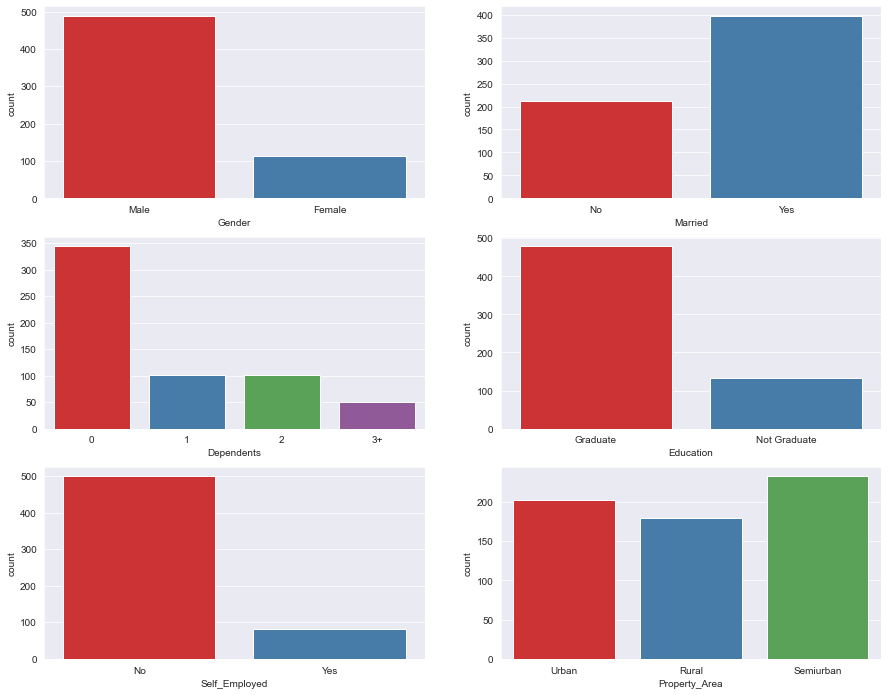

In [28]:
plt.figure(figsize=(15,12))
plot = 1
for var in categorical_features:
    plt.subplot(3,2,plot)
    sns.countplot(x=df[var],palette='Set1')
    plot+=1
plt.show()

- In the Gender Feature There are more number of male applicants than the female applicants
- Most of the applicants are married
- Mostly applicants have zero dependents followed by 1 and 2 dependents being equal and 3+ dependents being the least
- Most of the Loan applicants are Graduate
- People who are not self employeed tend to apply more for a loan rather than self employed
- People who live in Semiurban areas are more likely to apply for loan followed by urban areas and rural area being the least contributor to loan applicants

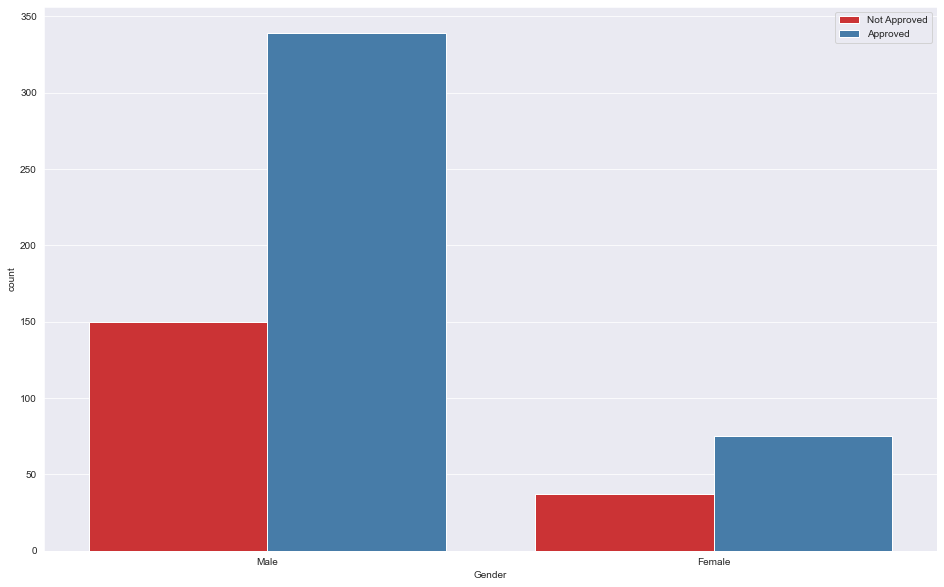

In [29]:
plt.figure(figsize=(16,10))
sns.countplot(x='Gender',hue='Loan_Status',data=df,palette='Set1')
plt.legend(labels=['Not Approved','Approved'],loc='upper right')
plt.show()

- Majorly males apply for loans and have the highest rate of getting approved or rejected

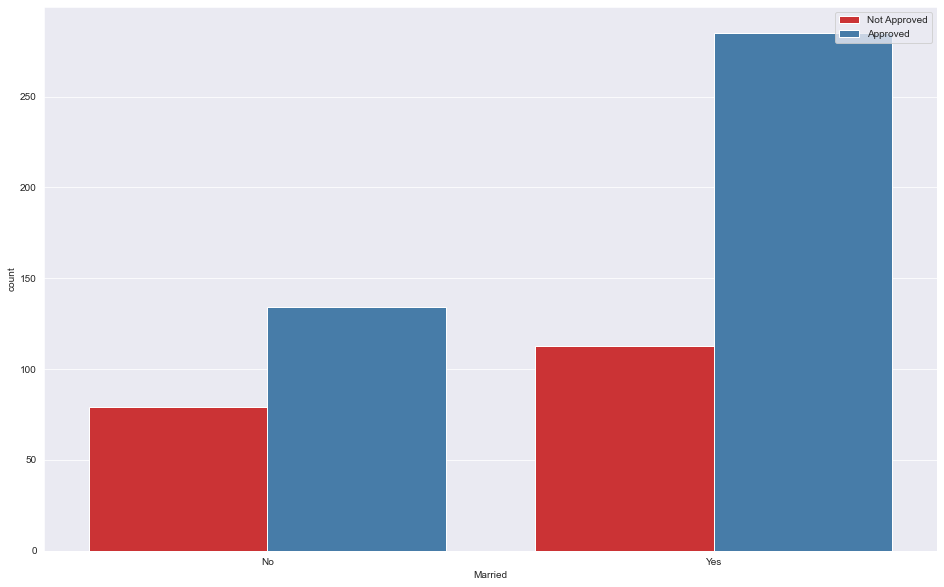

In [30]:
plt.figure(figsize=(16,10))
sns.countplot(x='Married',hue='Loan_Status',data=df,palette='Set1')
plt.legend(labels=['Not Approved','Approved'],loc='upper right')
plt.show()

- Majorly married population apply for loans
- Status of getting rejected for both the group has a slight difference Married beign the more
- Also the Married population has the higher chance of a loan getting approved

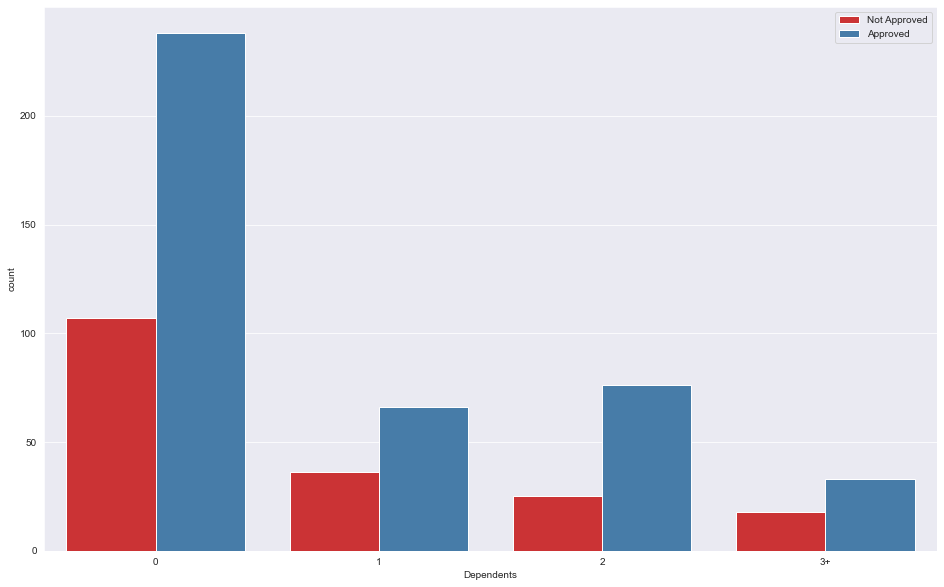

In [31]:
plt.figure(figsize=(16,10))
sns.countplot(x='Dependents',hue='Loan_Status',data=df,palette='Set1')
plt.legend(labels=['Not Approved','Approved'],loc='upper right')
plt.show()

- Majorly people with no dependents aaply for loan and have the highest rate of loan getting approved or rejected
- People with more than 3 dependents  have the lowest chance of approval of a loan

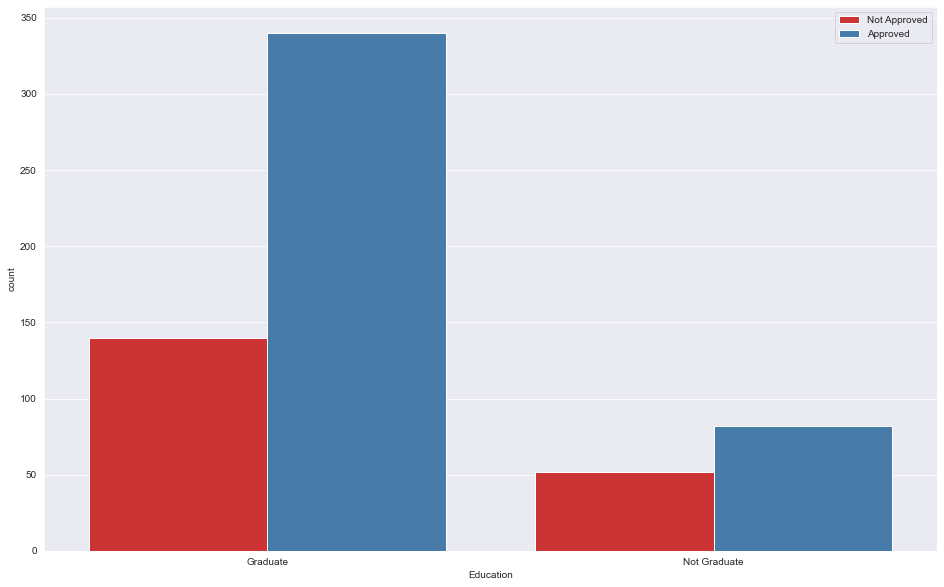

In [32]:
plt.figure(figsize=(16,10))
sns.countplot(x='Education',hue='Loan_Status',data=df,palette='Set1')
plt.legend(labels=['Not Approved','Approved'],loc='upper right')
plt.show()

- Graduates apply more for a loan
- Graduates have higher chance of loan getting approved

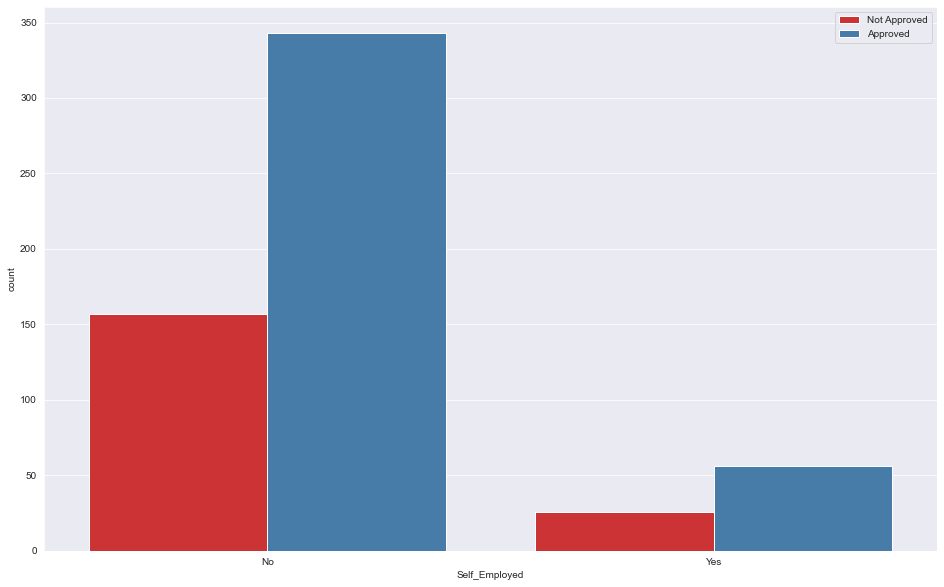

In [33]:
plt.figure(figsize=(16,10))
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df,palette='Set1')
plt.legend(labels=['Not Approved','Approved'],loc='upper right')
plt.show()

- Majorly people who are not self employed are more likely to apply for loans
- People who are self employed have lesser chance of loan getting approved or rejected

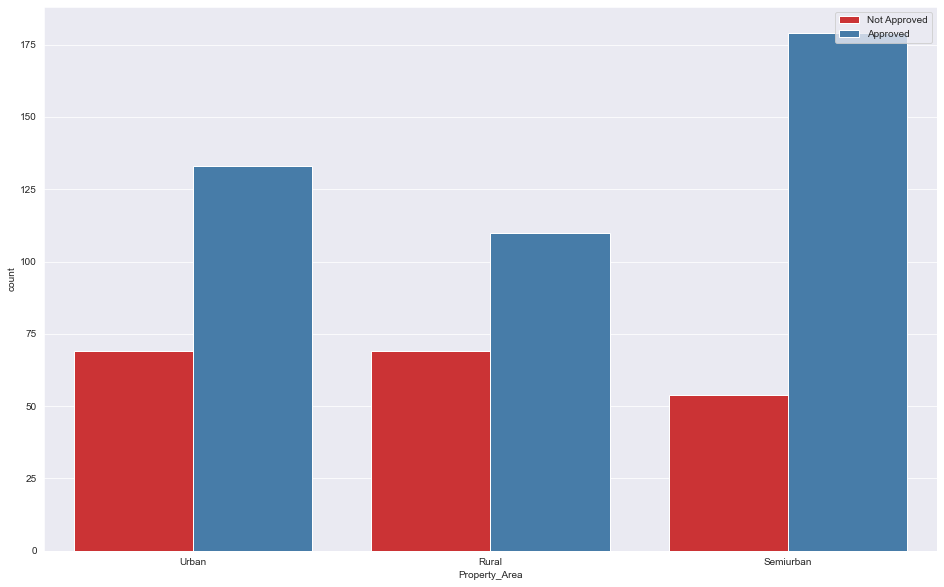

In [34]:
plt.figure(figsize=(16,10))
sns.countplot(x='Property_Area',hue='Loan_Status',data=df,palette='Set1')
plt.legend(labels=['Not Approved','Approved'],loc='upper right')
plt.show()

- Majorly people from semi urban areas apply for loan 
- Also people from semi-urban have higher chances of loan getting approved with non approval rate being the least

#### Missing Value Treatment

In [35]:
# checking null values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),'% missing values')

Gender 0.0212 % missing values
Married 0.0049 % missing values
Dependents 0.0244 % missing values
Self_Employed 0.0521 % missing values
LoanAmount 0.0358 % missing values
Loan_Amount_Term 0.0228 % missing values
Credit_History 0.0814 % missing values


In [37]:
#imputing numerical columns
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.median())
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median())
df.Credit_History = df.Credit_History.fillna(df.Credit_History.median())

In [38]:
# imputing categorical columns
df.Gender = df.Gender.fillna(df.Gender.mode()[0])
df.Married = df.Married.fillna(df.Married.mode()[0])
df.Dependents = df.Dependents.fillna(df.Dependents.mode()[0])
df.Self_Employed = df.Self_Employed.fillna(df.Self_Employed.mode()[0])

<AxesSubplot:>

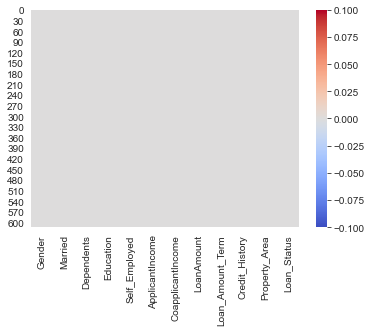

In [39]:
# checking null values
sns.heatmap(df.isnull(),cmap='coolwarm')

#### Outlier Detection and Treatment

In [40]:
df2 = df.copy()

In [41]:
#columns to detect outliers for 
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount',]
from scipy.stats import zscore
z = np.abs(zscore(df2.loc[:,cols]))
print(f" Indices of outliers : {np.where(z>3)}")
print(f" Number of outliers : {(np.shape(np.where(z > 3))[1]/(df2.shape[0]*df2.shape[1]))*100} %")

 Indices of outliers : (array([  9, 126, 130, 155, 155, 171, 171, 177, 177, 183, 185, 278, 308,
       333, 333, 369, 402, 409, 417, 432, 443, 487, 506, 523, 525, 561,
       581, 600, 604]), array([1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2,
       2, 2, 2, 2, 1, 1, 2]))
 Number of outliers : 0.3935939196525516 %


In [42]:
# defining a function to find the lower and upper bound 
def outliers(df,var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3-Q1
    outliers_step = 1.5*IQR 
    
    lower = Q1 - outliers_step
    upper = Q3 + outliers_step
    return lower,upper

In [43]:
for var in cols:
    lower_bound,upper_bound=outliers(df2,var)
    df2[var]=np.where(df2[var]<lower_bound,df2[var].median(),df2[var])
    df2[var]=np.where(df2[var]>upper_bound,df2[var].median(),df2[var])

### Feature Engineering

#### Treating Skewness 

In [44]:
df2[cols].skew()

ApplicantIncome      1.149106
CoapplicantIncome    0.936471
LoanAmount           0.498333
dtype: float64

Applicant income and Loan amount are the two variables who are positively skewed which is greater than 0.5 so have to treat skewness using some transformation techniques

In [45]:
# applying log transformation to reduce the skewness
df2.ApplicantIncome = np.log(df2.ApplicantIncome+1)
df2.CoapplicantIncome = np.log(df2.CoapplicantIncome+1)

In [46]:
df2[cols].skew()

ApplicantIncome     -1.040574
CoapplicantIncome   -0.187949
LoanAmount           0.498333
dtype: float64

In [47]:
#since ApplicantIncome got negatively skewed will try to reduce its skewness using power transform
df2.ApplicantIncome = np.power(df2.ApplicantIncome,2)

#### Encoding categorical features

In [48]:
df2[categorical_features]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural
610,Male,Yes,3+,Graduate,No,Rural
611,Male,Yes,1,Graduate,No,Urban
612,Male,Yes,2,Graduate,No,Urban


In [49]:
df2.shape

(614, 12)

In [50]:
#checking unique values in type feature
for i in categorical_features:
    print("Unique values in {} are \n{}".format(i,df2[i].unique()))
    print("-"*40)

Unique values in Gender are 
['Male' 'Female']
----------------------------------------
Unique values in Married are 
['No' 'Yes']
----------------------------------------
Unique values in Dependents are 
['0' '1' '2' '3+']
----------------------------------------
Unique values in Education are 
['Graduate' 'Not Graduate']
----------------------------------------
Unique values in Self_Employed are 
['No' 'Yes']
----------------------------------------
Unique values in Property_Area are 
['Urban' 'Rural' 'Semiurban']
----------------------------------------


In [51]:
# encoding by mapping Gender, Married, Education, Self_Employed  features with 0 and 1
df2.Gender = df2.Gender.map({'Female':0,'Male':1})
df2.Married = df2.Married.map({'No':0,'Yes':1})
df2.Education = df2.Education.map({'Not Graduate':0,'Graduate':1})
df2.Self_Employed = df2.Self_Employed.map({'No':0,'Yes':1})

In [52]:

#ordinal encoding Dependents and Property area
import category_encoders as ce


encoder= ce.OrdinalEncoder(cols=['Dependents','Property_Area'],mapping=[{'col':'Dependents','mapping':{'None':0,'0':1,'1':2,'2':3,'3+':4}},
                            {'col':'Property_Area','mapping':{'None':0,'Rural':1,'Semiurban':2,'Urban':3}}])
df3 = encoder.fit_transform(df2)

In [53]:
# checking head of encoded data
df3.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,1,1,0,75.241693,0.000000,128.0,360.0,1.0,3,1
1,1,1,2,1,0,71.070418,7.319202,128.0,360.0,1.0,1,0
2,1,1,1,1,1,64.107258,0.000000,66.0,360.0,1.0,3,1
3,1,1,1,0,0,61.733924,7.765993,120.0,360.0,1.0,3,1
4,1,0,1,1,0,75.684456,0.000000,141.0,360.0,1.0,3,1


In [54]:
## splitting into dependent and independent variables
X = df3.drop(['Loan_Status'],axis=1)
y = df3.Loan_Status

#### Scaling

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
x = pd.DataFrame(x_scaled, columns=X.columns)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,1.0,0.0,0.835680,0.000000,0.474104,0.74359,1.0,1.0
1,1.0,1.0,0.333333,1.0,0.0,0.766059,0.846290,0.474104,0.74359,1.0,0.0
2,1.0,1.0,0.000000,1.0,1.0,0.649839,0.000000,0.227092,0.74359,1.0,1.0
3,1.0,1.0,0.000000,0.0,0.0,0.610226,0.897951,0.442231,0.74359,1.0,1.0
4,1.0,0.0,0.000000,1.0,0.0,0.843070,0.000000,0.525896,0.74359,1.0,1.0


### Model Buliding 

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_roc_curve,roc_curve,auc,roc_auc_score,precision_score,recall_score,f1_score

In [71]:
# performing train test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [72]:
# creating instances for models
LR = LogisticRegression()
KNN = KNeighborsClassifier()
SV = SVC()
DTC = DecisionTreeClassifier()
NB = MultinomialNB()
RTF = RandomForestClassifier()
ADB = AdaBoostClassifier()
GB = GradientBoostingClassifier()

In [73]:
# creating list of model names and instances
models = [("Logistic Regression ",LR),
          ("K Nearest Neighbor classifier ",KNN),
          ("Support Vector classifier ",SV),
          ("Decision Tree classifier ",DTC),
          ("Random forest classifier ",RTF),
          ("AdaBoost classifier",ADB),
          ("Gradient Boosting classifier ",GB),
          ("Naive Bayes classifier",NB)]

##### Training the models 

In [74]:
for name,model in models:
    model.fit(xtrain,ytrain)
    print(name," trained")

Logistic Regression   trained
K Nearest Neighbor classifier   trained
Support Vector classifier   trained
Decision Tree classifier   trained
Random forest classifier   trained
AdaBoost classifier  trained
Gradient Boosting classifier   trained
Naive Bayes classifier  trained


##### Evaluating the models

In [75]:
train_scores=[]
test_scores=[]
Model = []
for name,model in models:
    print("******",name,"******")
    train_acc = accuracy_score(ytrain,model.predict(xtrain))
    test_acc = accuracy_score(ytest,model.predict(xtest))
    print('Train score : ',train_acc)
    print('Test score : ',test_acc)
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    Model.append(name)

****** Logistic Regression  ******
Train score :  0.8181818181818182
Test score :  0.7891891891891892
****** K Nearest Neighbor classifier  ******
Train score :  0.8181818181818182
Test score :  0.772972972972973
****** Support Vector classifier  ******
Train score :  0.8181818181818182
Test score :  0.7891891891891892
****** Decision Tree classifier  ******
Train score :  1.0
Test score :  0.6756756756756757
****** Random forest classifier  ******
Train score :  1.0
Test score :  0.7783783783783784
****** AdaBoost classifier ******
Train score :  0.8531468531468531
Test score :  0.7675675675675676
****** Gradient Boosting classifier  ******
Train score :  0.9067599067599068
Test score :  0.7567567567567568
****** Naive Bayes classifier ******
Train score :  0.6946386946386947
Test score :  0.6702702702702703


****** Logistic Regression  ******

 ROC_AUC_SCORE :  0.6886567953463776
              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185

Precision:  0.7672955974842768
Recall:  0.9838709677419355
F1 score:  0.8621908127208482
AxesSubplot(0.125,0.536818;0.62x0.343182)


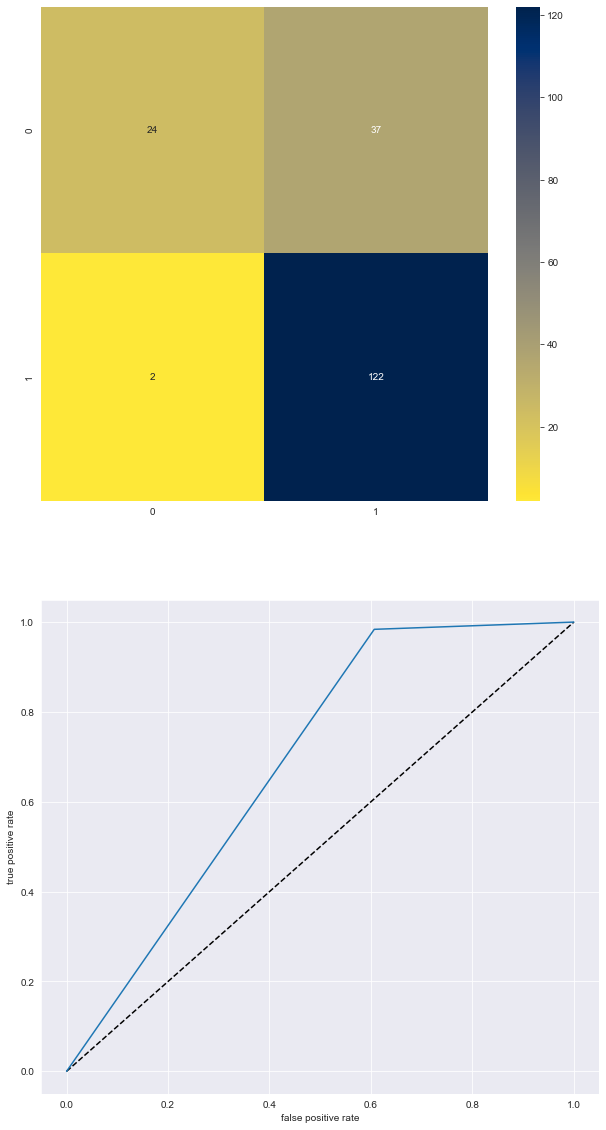

****** K Nearest Neighbor classifier  ******

 ROC_AUC_SCORE :  0.6765600211528292
              precision    recall  f1-score   support

           0       0.83      0.39      0.53        61
           1       0.76      0.96      0.85       124

    accuracy                           0.77       185
   macro avg       0.80      0.68      0.69       185
weighted avg       0.78      0.77      0.75       185

Precision:  0.7628205128205128
Recall:  0.9596774193548387
F1 score:  0.85
AxesSubplot(0.125,0.536818;0.62x0.343182)


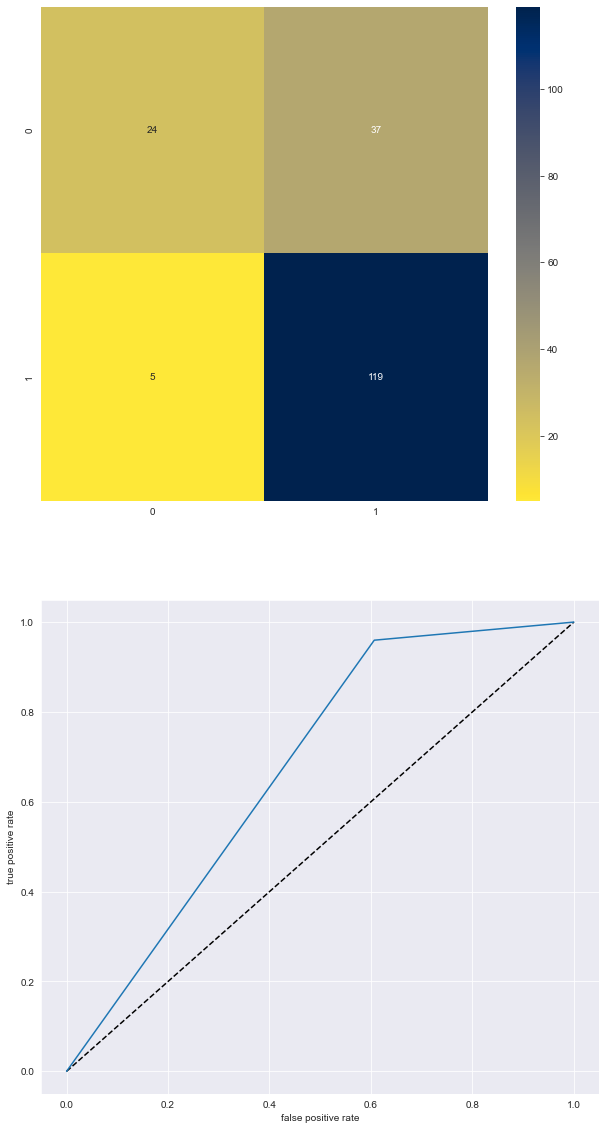

****** Support Vector classifier  ******

 ROC_AUC_SCORE :  0.6886567953463776
              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185

Precision:  0.7672955974842768
Recall:  0.9838709677419355
F1 score:  0.8621908127208482
AxesSubplot(0.125,0.536818;0.62x0.343182)


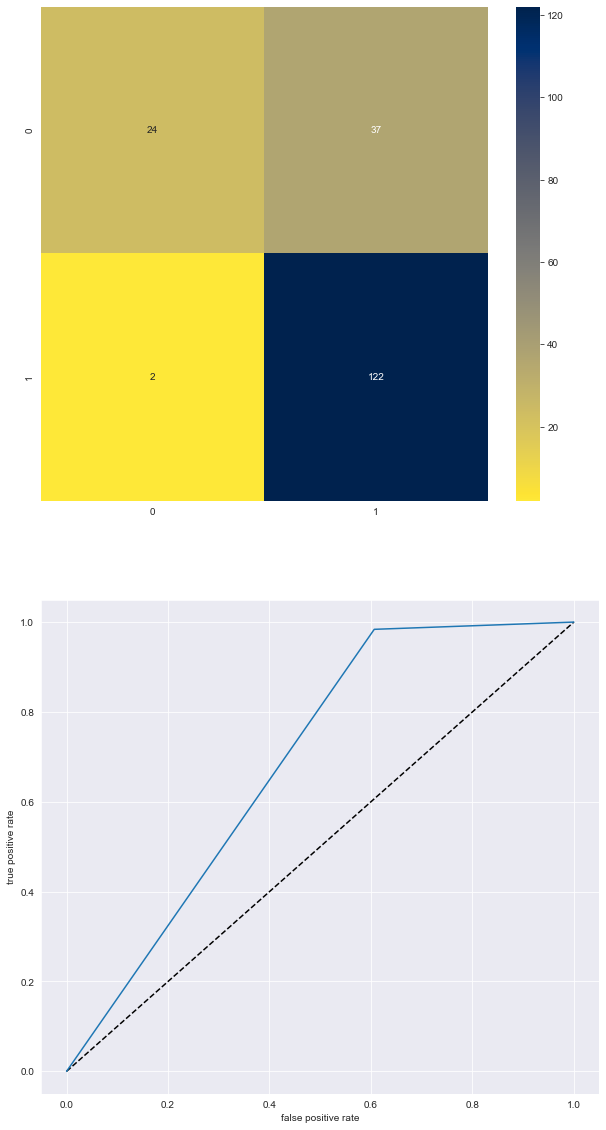

****** Decision Tree classifier  ******

 ROC_AUC_SCORE :  0.6289661554732945
              precision    recall  f1-score   support

           0       0.51      0.49      0.50        61
           1       0.75      0.77      0.76       124

    accuracy                           0.68       185
   macro avg       0.63      0.63      0.63       185
weighted avg       0.67      0.68      0.67       185

Precision:  0.753968253968254
Recall:  0.7661290322580645
F1 score:  0.76
AxesSubplot(0.125,0.536818;0.62x0.343182)


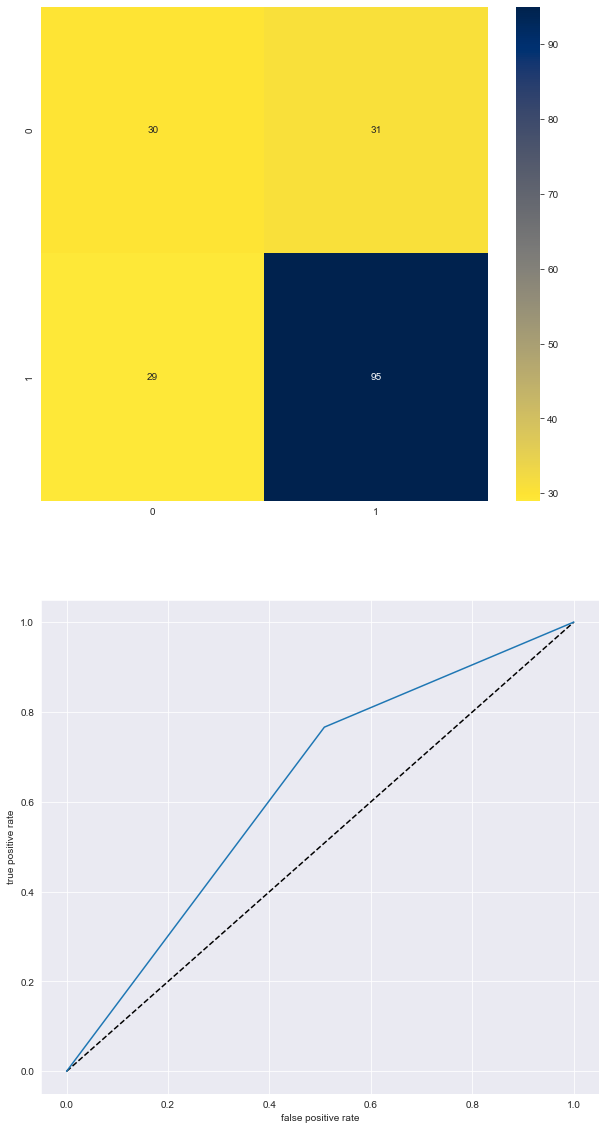

****** Random forest classifier  ******

 ROC_AUC_SCORE :  0.6930856689582232
              precision    recall  f1-score   support

           0       0.79      0.44      0.57        61
           1       0.77      0.94      0.85       124

    accuracy                           0.78       185
   macro avg       0.78      0.69      0.71       185
weighted avg       0.78      0.78      0.76       185

Precision:  0.7748344370860927
Recall:  0.9435483870967742
F1 score:  0.8509090909090908
AxesSubplot(0.125,0.536818;0.62x0.343182)


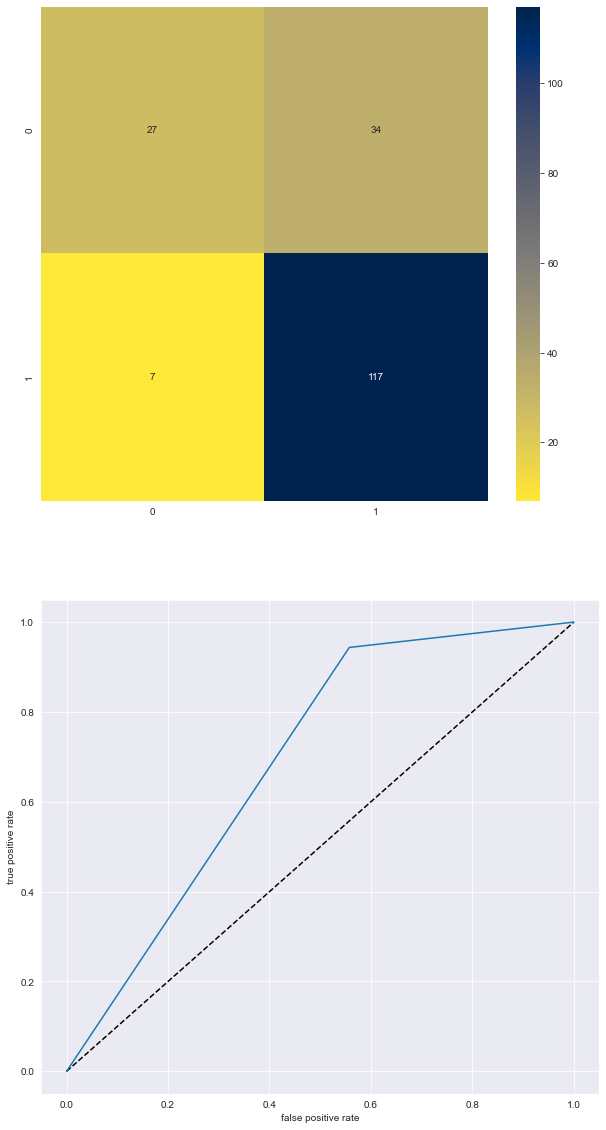

****** AdaBoost classifier ******

 ROC_AUC_SCORE :  0.685021152829191
              precision    recall  f1-score   support

           0       0.75      0.44      0.56        61
           1       0.77      0.93      0.84       124

    accuracy                           0.77       185
   macro avg       0.76      0.69      0.70       185
weighted avg       0.76      0.77      0.75       185

Precision:  0.7718120805369127
Recall:  0.9274193548387096
F1 score:  0.8424908424908425
AxesSubplot(0.125,0.536818;0.62x0.343182)


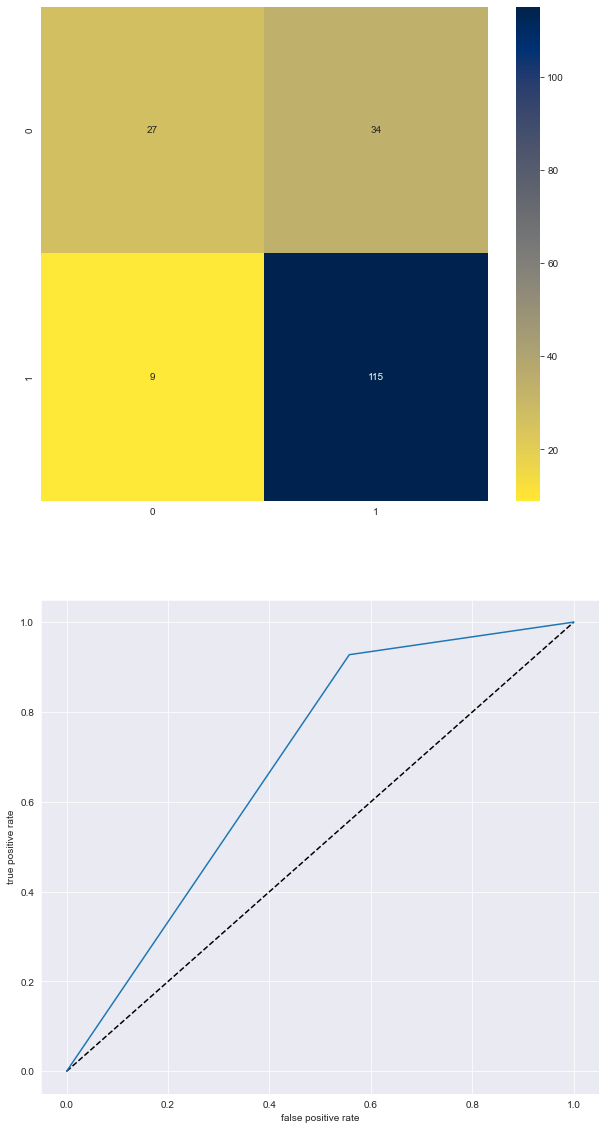

****** Gradient Boosting classifier  ******

 ROC_AUC_SCORE :  0.681121099947118
              precision    recall  f1-score   support

           0       0.70      0.46      0.55        61
           1       0.77      0.90      0.83       124

    accuracy                           0.76       185
   macro avg       0.74      0.68      0.69       185
weighted avg       0.75      0.76      0.74       185

Precision:  0.7724137931034483
Recall:  0.9032258064516129
F1 score:  0.8327137546468402
AxesSubplot(0.125,0.536818;0.62x0.343182)


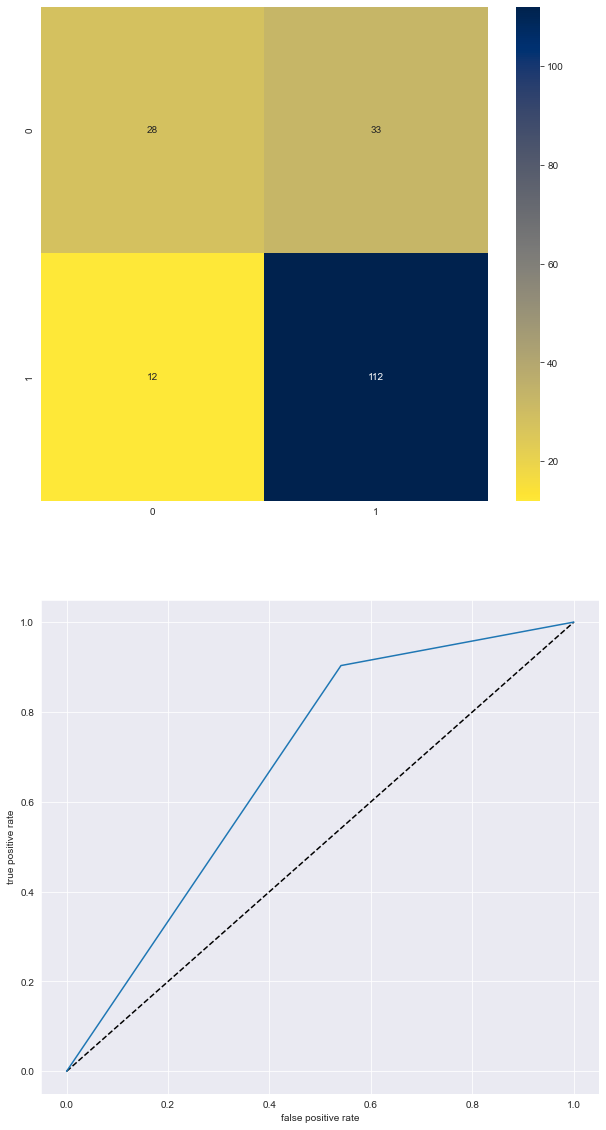

****** Naive Bayes classifier ******

 ROC_AUC_SCORE :  0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.67      1.00      0.80       124

    accuracy                           0.67       185
   macro avg       0.34      0.50      0.40       185
weighted avg       0.45      0.67      0.54       185

Precision:  0.6702702702702703
Recall:  1.0
F1 score:  0.8025889967637541
AxesSubplot(0.125,0.536818;0.62x0.343182)


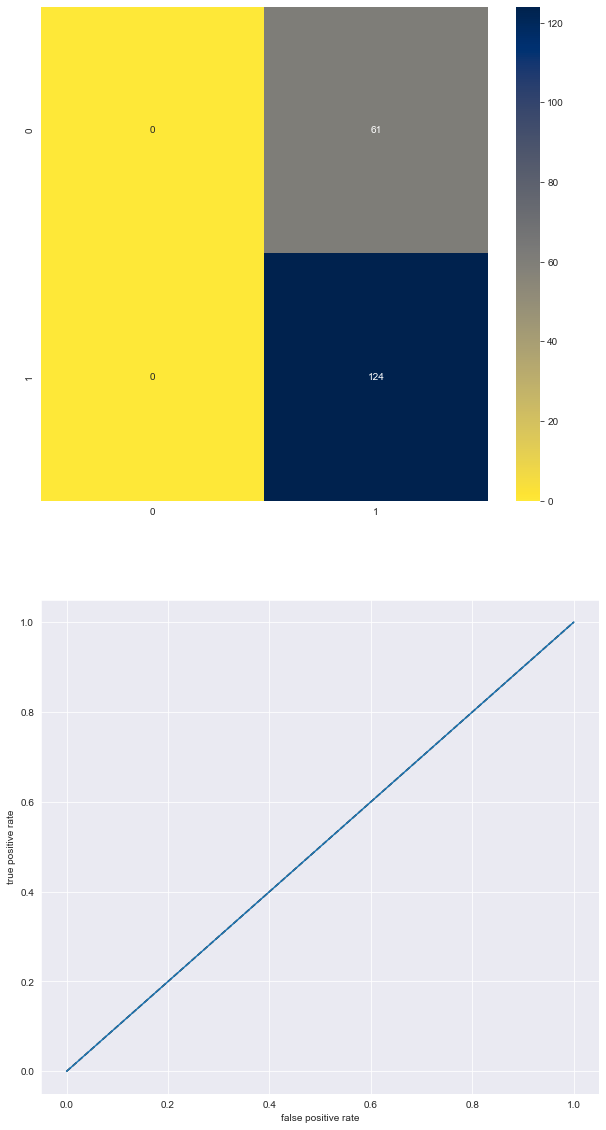

In [76]:
# checking different metrics for evaluation
precision_ =[]
recall_ = []
f1score = []
rocauc = []
for name,model in models:
    print("******",name,"******")
    
    fpr,tpr,thresholds=roc_curve(ytest,model.predict(xtest))
    roc_auc= auc(fpr,tpr)
    print("\n","ROC_AUC_SCORE : ",roc_auc)
    rocauc.append(roc_auc)
    print(classification_report(ytest,model.predict(xtest)))
    precision = precision_score(ytest, model.predict(xtest))
    print('Precision: ', precision)
    precision_.append(precision)
    recall = recall_score(ytest, model.predict(xtest))
    print('Recall: ', recall)
    recall_.append(recall)
    f1 = f1_score(ytest, model.predict(xtest))
    print('F1 score: ', f1)
    f1score.append(f1)
    plt.figure(figsize=(10,20))
    plt.subplot(211)
    cm = confusion_matrix(ytest,model.predict(xtest))
    print(sns.heatmap(cm,annot=True,fmt='d',cmap='cividis_r'))
    plt.subplot(212)
    plt.plot([0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

In [77]:
# checking cross validation score
crossval=[]
for name,model in models:
    print("******",name,"******")
    cv_= cross_val_score(model,x,y,cv=5).mean()
    print(cv_)
    crossval.append(cv_)

****** Logistic Regression  ******
0.809462881514061
****** K Nearest Neighbor classifier  ******
0.7605757696921231
****** Support Vector classifier  ******
0.809462881514061
****** Decision Tree classifier  ******
0.6986538717846196
****** Random forest classifier  ******
0.7915633746501399
****** AdaBoost classifier ******
0.7752632280421163
****** Gradient Boosting classifier  ******
0.7752765560442489
****** Naive Bayes classifier ******
0.6872984139677463


In [78]:
# creating a data frame for evaluation
evaluate = pd.DataFrame({})
evaluate['Model'] = Model
evaluate['Train score'] = train_scores
evaluate['Test score'] = test_scores
evaluate['Precision'] = precision_
evaluate['Recall'] = recall_
evaluate['F1 score'] = f1score
evaluate['Roc-Auc score'] = rocauc
evaluate['Cross val score'] = crossval

evaluate

,Model,Train score,Test score,Precision,Recall,F1 score,Roc-Auc score,Cross val score
0,Logistic Regression,0.818182,0.789189,0.767296,0.983871,0.862191,0.688657,0.809463
1,K Nearest Neighbor classifier,0.818182,0.772973,0.762821,0.959677,0.850000,0.676560,0.760576
2,Support Vector classifier,0.818182,0.789189,0.767296,0.983871,0.862191,0.688657,0.809463
3,Decision Tree classifier,1.000000,0.675676,0.753968,0.766129,0.760000,0.628966,0.698654
4,Random forest classifier,1.000000,0.778378,0.774834,0.943548,0.850909,0.693086,0.791563
5,AdaBoost classifier,0.853147,0.767568,0.771812,0.927419,0.842491,0.685021,0.775263
6,Gradient Boosting classifier,0.906760,0.756757,0.772414,0.903226,0.832714,0.681121,0.775277
7,Naive Bayes classifier,0.694639,0.670270,0.670270,1.000000,0.802589,0.500000,0.687298


Since logistic regression and support vector classifier are performing equally best so wil be choosing Logistic regresssion as final model

### Hyperparameter tuning

In [85]:
# selecting parametr grid to tune model
params = {'penalty':['l1','l2','elasticnet'],
          'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
          'C':[100, 10, 1.0, 0.1, 0.01],
          'multi_class':['auto','ovr','multinomial']
         }
grid_search=GridSearchCV(LR,params,n_jobs=-1,cv=5,verbose=5)
grid_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=5)

In [86]:
# best parameters after grid search
grid_search.best_params_

{'C': 100, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}

In [87]:
grid_search.best_estimator_

LogisticRegression(C=100, penalty='l1', solver='liblinear')

Accuracy Score 0.7891891891891892
Cross val score 0.8078235372517659


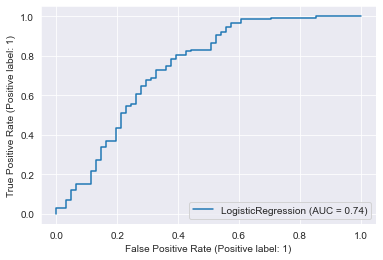

In [88]:
## tuning model
tuned_mod = LogisticRegression(C=100, penalty='l1', solver='liblinear')
tuned_mod.fit(xtrain,ytrain)
tuned_pred = tuned_mod.predict(xtest)
print("Accuracy Score",accuracy_score(ytest,tuned_pred))
cross_val = cross_val_score(tuned_mod,x,y,scoring='accuracy',cv=5).mean()
print("Cross val score",cross_val)
plot_roc_curve(tuned_mod,xtest,ytest)

### Saving the model

In [121]:
import joblib
joblib.dump(tuned_mod,'Loan_Application_Status.pkl')

['Loan_Application_Status.pkl']